# **Rivieri Lautaro**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos la clase (se mantiene igual)
class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada

        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [4,3,5] - 4 entradas, 3 ocultas, 5 salidas
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random((layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            deltas.reverse()

            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_weights(self):
        return self.weights

    def get_deltas(self):
        return self.deltas

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1.0 - x**2

def valNN(x):
    return (int)(abs(round(x)))

### **Tablas de Verdad y entrenamiento de la red con gráficas**

=== ENTRENAMIENTO ===
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000

=== RESULTADOS ===
Entrada: [-1  0 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1  0  1 -1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  0 -1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  0  1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [-1  1 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [-1 -1 -1 -1] -> Esperado: [1 0 0 1 0] | Obtenido: [1, 0, 0, 1, 0]
Entrada: [ 0 -1 -1  1] -> Esperado: [0 1 0 1 1] | Obtenido: [0, 1, 0, 1, 1]
Entrada: [ 0 -1  1  1] -> Esperado: [0 1 0 1 1] | Obtenido: [0, 1, 0, 1, 1]
Entrada: [ 0  1 -1  1] -> Esperado: [1 0 1 0 1] | Obtenido: [1, 0, 1, 0, 1]
Entrada: [0 1 1 1] -> Esperado: [1 0 1 0 1] | Obtenido: [1, 0, 1, 0, 1]
Entrada: [ 0  0 -1  1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 0, 0, 1, 1]
Entrada: [0 0 1 1] -> Esperado: [1 0 0 1 1] | Obtenido: [1, 

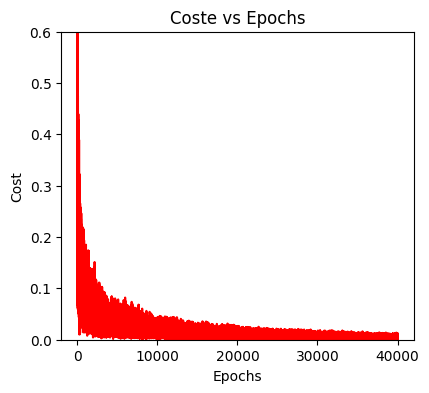

In [13]:
nn1 = NeuralNetwork([4, 6, 5], activation='tanh')

# Entradas: [Distancia, Posición, Peso, Línea]
X1 = np.array([
    # Sin obstáculos, diferentes estados de peso y línea
    [-1, 0, -1, -1],   # sin obstaculos, sin peso, sin línea
    [-1, 0, 1, -1],    # sin obstaculos, con peso, sin línea
    [-1, 0, -1, 1],    # sin obstaculos, sin peso, con línea
    [-1, 0, 1, 1],     # sin obstaculos, con peso, con línea

    [-1, 1, -1, -1],   # sin obstaculos derecha
    [-1, -1, -1, -1],  # sin obstaculos izquierda

    # Obstáculos detectados
    [0, -1, -1, 1],    # obstaculo derecha, sin peso, con línea
    [0, -1, 1, 1],     # obstaculo derecha, con peso, con línea
    [0, 1, -1, 1],     # obstaculo izquierda, sin peso, con línea
    [0, 1, 1, 1],      # obstaculo izquierda, con peso, con línea
    [0, 0, -1, 1],     # obstaculo centro, sin peso, con línea
    [0, 0, 1, 1],      # obstaculo centro, con peso, con línea

    # Demasiado cerca
    [1, 1, -1, -1],    # demasiado cerca derecha
    [1, -1, -1, -1],   # demasiado cerca izquierda
    [1, 0, -1, -1],    # demasiado cerca centro
    [1, 1, 1, -1],     # demasiado cerca derecha con peso
    [1, 0, 1, -1]      # demasiado cerca centro con peso
])

# Salidas: [Motor1, Motor2, Motor3, Motor4, LED]
# LED se enciende (1) cuando hay peso (1) o cuando sigue línea (1)
y1 = np.array([
    [1,0,0,1, 0],  # avanzar, LED apagado
    [1,0,0,1, 1],  # avanzar, LED encendido (peso)
    [1,0,0,1, 1],  # avanzar, LED encendido (línea)
    [1,0,0,1, 1],  # avanzar, LED encendido (ambos)

    [1,0,0,1, 0],  # avanzar
    [1,0,0,1, 0],  # avanzar

    [0,1,0,1, 1],  # giro derecha, LED línea
    [0,1,0,1, 1],  # giro derecha, LED ambos
    [1,0,1,0, 1],  # giro izquierda, LED línea
    [1,0,1,0, 1],  # giro izquierda, LED ambos
    [1,0,0,1, 1],  # avanzar, LED línea
    [1,0,0,1, 1],  # avanzar, LED ambos

    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 0],  # retroceder
    [0,1,1,0, 1],  # retroceder con LED peso
    [0,1,1,0, 1]   # retroceder con LED peso
])

print("=== ENTRENAMIENTO ===")
nn1.fit(X1, y1, learning_rate=0.03, epochs=40001)

print("\n=== RESULTADOS ===")
index = 0
for e in X1:
    prediccion = nn1.predict(e)
    print(f"Entrada: {e} -> Esperado: {y1[index]} | Obtenido: {[valNN(p) for p in prediccion]}")
    index += 1

# Gráfica de coste
deltas1 = nn1.get_deltas()
valores1 = []
for arreglo in deltas1:
    valores1.append(np.mean(np.abs(arreglo[1])))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(valores1)), valores1, color='r')
plt.ylim([0, 0.6])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Coste vs Epochs')

print("\n=== PESOS FINALES ===")
nn1.print_weights()